In [2]:
from Bio.PDB import PDBParser
import numpy as np
import glob, os
import matplotlib.pyplot as plt


In [3]:
# read all pdb files in a directory
pdb_files = []
for file in os.listdir(".\Supplementary"):
    if file.endswith(".pdb"):
        pdb_files.append(os.path.join(".\Supplementary", file))

In [3]:
len(pdb_files)

27

In [4]:
os.path.splitext(os.path.basename(pdb_files[0]))

('1axe', '.pdb')

In [11]:
with open(pdb_files[0], "r") as f:
    lines = f.readlines();
len(lines)

6553

In [33]:
Helix_index = [1,5,6]
HELIX = {
    1 : "Right-handed alpha      ",
    5 : "Right-handed 310        ",
    6 : "Left-handed Helix       "
}
HELIX_length = {
    1 : 0,
    5 : 0,
    6 : 0
}
SHEET_length = 0
total_length = 0


In [34]:
for line in lines:
    if line[:5]=="HELIX":
        length = int(line[71:76])
        helix_type = int(line[38:40])
        if helix_type in Helix_index:
            HELIX_length[helix_type] += length
        total_length += length       

In [25]:
HELIX_length

{1: 141, 5: 79, 6: 0}

In [26]:
total_length

220

In [35]:
# all sheet length of a pdb file
for line in lines:
    if line[:5]=="SHEET":
        length = int(line[33:37])-int(line[22:26])
        SHEET_length += length
        total_length += length

In [28]:
SHEET_length

134

In [29]:
total_length

354

In [36]:
for key in HELIX_length:
    HELIX_length[key] /= total_length
SHEET_length /= total_length

In [37]:
print("Secondary structure     Abundance")
for key in HELIX_length:
    print(HELIX[key], HELIX_length[key])
print("SHEET                   ", SHEET_length)

Secondary structure     Abundance
Right-handed alpha       0.3983050847457627
Right-handed 310         0.2231638418079096
Left-handed Helix        0.0
SHEET                    0.3785310734463277


In [46]:
for pdb_file in pdb_files:
    with open(pdb_file, "r") as f:
        lines = f.readlines();
        Helix_index = [1,5]
        HELIX = {
            1 : "Right-handed alpha      ",
            5 : "Right-handed 310        "
        }
        HELIX_length = {
            1 : 0,
            5 : 0
        }
        SHEET_length = 0
        total_length = 0
        # all helix length of a pdb file
        for line in lines:
            if line[:5]=="HELIX":
                length = int(line[71:76])
                helix_type = int(line[38:40])
                if helix_type in Helix_index:
                    HELIX_length[helix_type] += length
                total_length += length       
        # all sheet length of a pdb file
        for line in lines:
            if line[:5]=="SHEET":
                length = int(line[33:37])-int(line[22:26])+1
                SHEET_length += length
                total_length += length
# Calculate the relativ length
for key in HELIX_length:
    HELIX_length[key] /= total_length
SHEET_length /= total_length
# Print the result
print("Secondary structure     Abundance")
for key in HELIX_length:
    print(HELIX[key], HELIX_length[key])
print("SHEET                   ", SHEET_length)

Secondary structure     Abundance
Right-handed alpha       0.6824644549763034
Right-handed 310         0.10584518167456557
SHEET                    0.21169036334913113


In [57]:
from Bio import SeqIO
alphabet = [chr(i) for i in range(65, 65+26)]
counter = 0
chains = {}
for record in SeqIO.parse(pdb_files[0], "pdb-seqres"):
    chains[alphabet[counter]] = record.seq
    counter += 1

In [58]:
chains

{'A': Seq('STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVS...LTF'),
 'B': Seq('STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVS...LTF')}

In [59]:
chains['A'][10]

'A'

In [8]:
# from Bio.SeqUtils import seq1

# pdbparser = PDBParser()

# structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_files[0])), pdb_files[0])
# chains = {chain.id:seq1(''.join(residue.resname for residue in chain)) for chain in structure.get_chains()}

# chains

c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6214.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6379.
  warnings.warn(


{'A': 'STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVSGTLVTPLPVIAGHEAAGIVESIGEGVTTVRPGDKVIPLWTPQCGKCRVCKHPEGNFCLKNDLSMPRGTMQDGTSRFTCRGKPIHHFLGTSTFSQYTVVDEISVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIMGCKAAGAARIIGVDINKDKFAKAKEVGATECVNPQDYKKPIQEVLTEMSNGGVDFSFEVIGRLDTMVTALSCCQEAYGVSVIVGVPPDSQNLSMNPMLLLSGRTWKGAIFGGFKSKDSVPKLVADFMAKKFALDPLITHVLPFEKINEGFDLLRSGESIRTILTFXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX',
 'B': 'STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVSGTLVTPLPVIAGHEAAGIVESIGEGVTTVRPGDKVIPLWTPQCGKCRVCKHPEGNFCLKNDLSMPRGTMQDGTSRFTCRGKPIHHFLGTSTFSQYTVVDEISVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIMGCKAAGAARIIGVDINKDKFAKAKEVGATECVNPQDYKKPIQEVLTEMSNGGVDFSFEVIGRLDTMVTALSCCQEAYGVSVIVGVPPDSQNLSMNPMLLLSGRTWKGAIFGGFKSKDSVPKLVADFMAKKFALDPLITHVLPFEKINEGFDLLRSGESIRTILTFXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'}

In [60]:
amino_acids = "ARNDCEQGHILKMFPSTWYV"
HELIX_aa_counter = {}
SHEET_aa_counter = {}
for i in range(len(amino_acids)):
    HELIX_aa_counter[amino_acids[i]] = 0
    SHEET_aa_counter[amino_acids[i]] = 0
for pdb_file in pdb_files:
    with open(pdb_file, "r") as f:
        lines = f.readlines();
        for line in lines:
            if (line[:5]=="HELIX"):
                if int(line[38:40])==1:
                    chain = line[19] 
                    start = int(line[21:25])-1
                    end = int(line[33:37])
                    for aa in chains[chain][start:end]:
                        HELIX_aa_counter[aa] += 1
            if (line[:5]=="SHEET"):
                chain = line[21] 
                start = int(line[22:26])-1
                end = int(line[33:37])
                for aa in chains[chain][start:end]:
                    SHEET_aa_counter[aa] += 1


In [61]:
total_aa_helix = 0
for aa in amino_acids:
    total_aa_helix += HELIX_aa_counter[aa]
for aa in amino_acids:
    HELIX_aa_counter[aa] /= total_aa_helix 

In [62]:
total_aa_sheet = 0
for aa in amino_acids:
    total_aa_sheet += SHEET_aa_counter[aa]
for aa in amino_acids:
    SHEET_aa_counter[aa] /= total_aa_sheet 

In [63]:
for aa in amino_acids:
    print(aa+" & ", end="")
    print("{:.3f}".format(HELIX_aa_counter[aa]), end=" & ")
    print(aa+" & ", end="")
    print("{:.3f}".format(SHEET_aa_counter[aa]), end="\\\\ \n")

A & 0.064 & A & 0.081\\ 
R & 0.021 & R & 0.035\\ 
N & 0.000 & N & 0.000\\ 
D & 0.071 & D & 0.012\\ 
C & 0.043 & C & 0.047\\ 
E & 0.043 & E & 0.093\\ 
Q & 0.014 & Q & 0.000\\ 
G & 0.099 & G & 0.047\\ 
H & 0.014 & H & 0.012\\ 
I & 0.043 & I & 0.145\\ 
L & 0.099 & L & 0.023\\ 
K & 0.064 & K & 0.076\\ 
M & 0.057 & M & 0.012\\ 
F & 0.028 & F & 0.047\\ 
P & 0.014 & P & 0.035\\ 
S & 0.106 & S & 0.047\\ 
T & 0.057 & T & 0.093\\ 
W & 0.000 & W & 0.012\\ 
Y & 0.014 & Y & 0.012\\ 
V & 0.149 & V & 0.174\\ 


In [4]:
from Bio.PDB import PDBParser
pdbparser = PDBParser()
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_files[0])), pdb_files[0])
chains = {chain.id:chain for chain in structure.get_chains()}


c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6214.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6379.
  warnings.warn(


In [46]:
for residues in chains["A"].get_residues():
    for atom in residues.get_atoms():
        print(atom.get_name())
        print([id for id in atom.get_full_id()])

N
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('N', ' ')]
CA
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('CA', ' ')]
C
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('C', ' ')]
O
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('O', ' ')]
CB
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('CB', ' ')]
OG
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('OG', ' ')]
N
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('N', ' ')]
CA
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('CA', ' ')]
C
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('C', ' ')]
O
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('O', ' ')]
CB
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('CB', ' ')]
OG1
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('OG1', ' ')]
CG2
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('CG2', ' ')]
N
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('N', ' ')]
CA
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('CA', ' ')]
C
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('C', ' ')]
O
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('O', ' ')]
CB
[('1axe', '.pdb'), 0, 'A'

In [19]:
Helices = []
with open(pdb_files[0], "r") as f:
    lines = f.readlines();
    for line in lines:
        if (line[:5]=="HELIX"):
            if int(line[38:40])==1:
                chain = line[19] 
                start = int(line[21:25])-1
                end = int(line[33:37])
                Helices.append((chain, start, end))

In [11]:
distances = []
o_coord = {}
n_coord = {}
for chain_id in chains:
    aa_counter = 0
    n_coord[chain_id] = []
    o_coord[chain_id] = []
    for residue in chains[chain_id].get_residues():
        atom_counter = 0
        for atom in residue.get_atoms():
            if (atom.get_name()=="N") & (atom_counter==0):
                n_coord[chain_id].append(atom.get_coord())
            if (atom.get_name()=="O") & (atom_counter==3):
                o_coord[chain_id].append(atom.get_coord())
            atom_counter += 1



In [15]:
for chain_id in chains:
    chain_length = len(o_coord[chain_id])
    for i in range(chain_length):
        if (i+4)>=chain_length:
            break
        else:
            o = o_coord[chain_id][i]
            n = n_coord[chain_id][i+4]
            square_distance = 0
            for j in range(len(o)):
                square_distance += (n[j]-o[j])**2
            distances.append(np.sqrt(square_distance))

(array([0.20184264, 0.05337185, 0.05143106, 0.08345417, 0.070839  ,
        0.08345417, 0.10480291, 0.17273072, 0.17273072, 0.08248377]),
 array([ 2.5832833 ,  3.51166687,  4.44005045,  5.36843402,  6.29681759,
         7.22520116,  8.15358473,  9.0819683 , 10.01035187, 10.93873544,
        11.86711902]),
 <BarContainer object of 10 artists>)

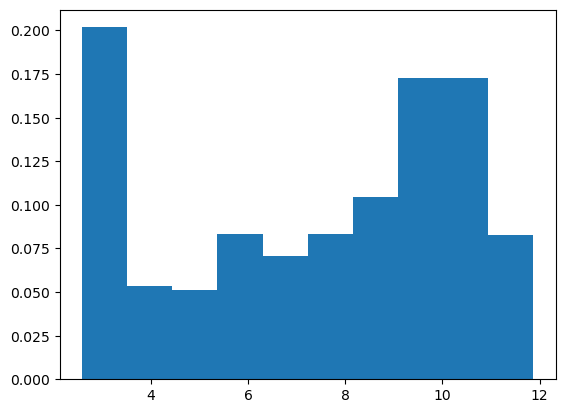

In [17]:
plt.hist(distances, density=True)

In [20]:
distance_helices = []
for (chain_id, start, end) in Helices:
    if start+4 >= end:
        continue
    else:
        for i in range(start, end-4):
            o = o_coord[chain_id][i]
            n = n_coord[chain_id][i+4]
            square_distance = 0
            for j in range(len(o)):
                square_distance += (n[j]-o[j])**2
            distance_helices.append(np.sqrt(square_distance))


(array([1.57252737, 0.78626368, 0.26208789, 0.07488226, 0.11232338,
        0.11232338, 0.03744113, 0.        , 0.        , 0.07488226]),
 array([2.73467215, 3.06440792, 3.39414369, 3.72387945, 4.05361522,
        4.38335099, 4.71308676, 5.04282253, 5.37255829, 5.70229406,
        6.03202983]),
 <BarContainer object of 10 artists>)

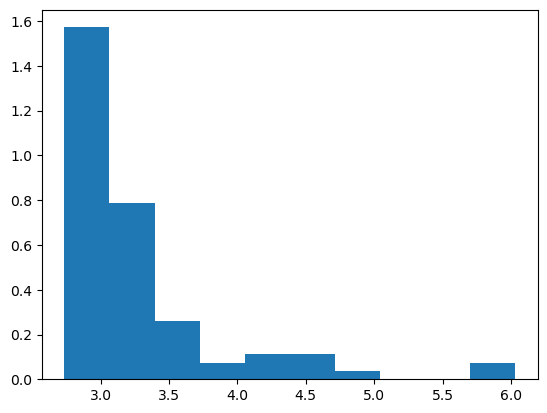

In [23]:
plt.hist(distance_helices, density =True)

In [7]:
for residues in chains["A"].get_residues():
    for atom in residues.get_atoms():
        print(atom.get_name())
        print(atom.get_coord())
    break

N
[-22.517 -14.59   51.931]
CA
[-22.742 -14.61   50.448]
C
[-22.189 -13.325  49.817]
O
[-21.945 -12.342  50.518]
CB
[-24.233 -14.77   50.128]
OG
[-24.429 -15.083  48.759]


In [9]:
for key in chains:
    print(key)

A
B
